##Capstone Project 2:  Healthcare PGP

**Objective:** To accurate predict whether the patients in the dataset have diabetes or not diabetes.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Check file directory
import os
os.getcwd()

'/kaggle/working'

In [3]:
#import google colab for interactive dataframe and import google drive to mount drive
from google.colab import data_table
data_table.enable_dataframe_formatter()
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
#Import Data from Healthcare PGP
diabetes_data=pd.read_csv('/kaggle/input/health-care-diabetes/health care diabetes.csv')

**Data Exploration**

In [5]:
#Display first five rows
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Check the shape of the dataset
diabetes_data.shape

(768, 9)

In [7]:
#Check for any null value beside 0 is missing value for stated variables
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Perform descriptive analysis
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

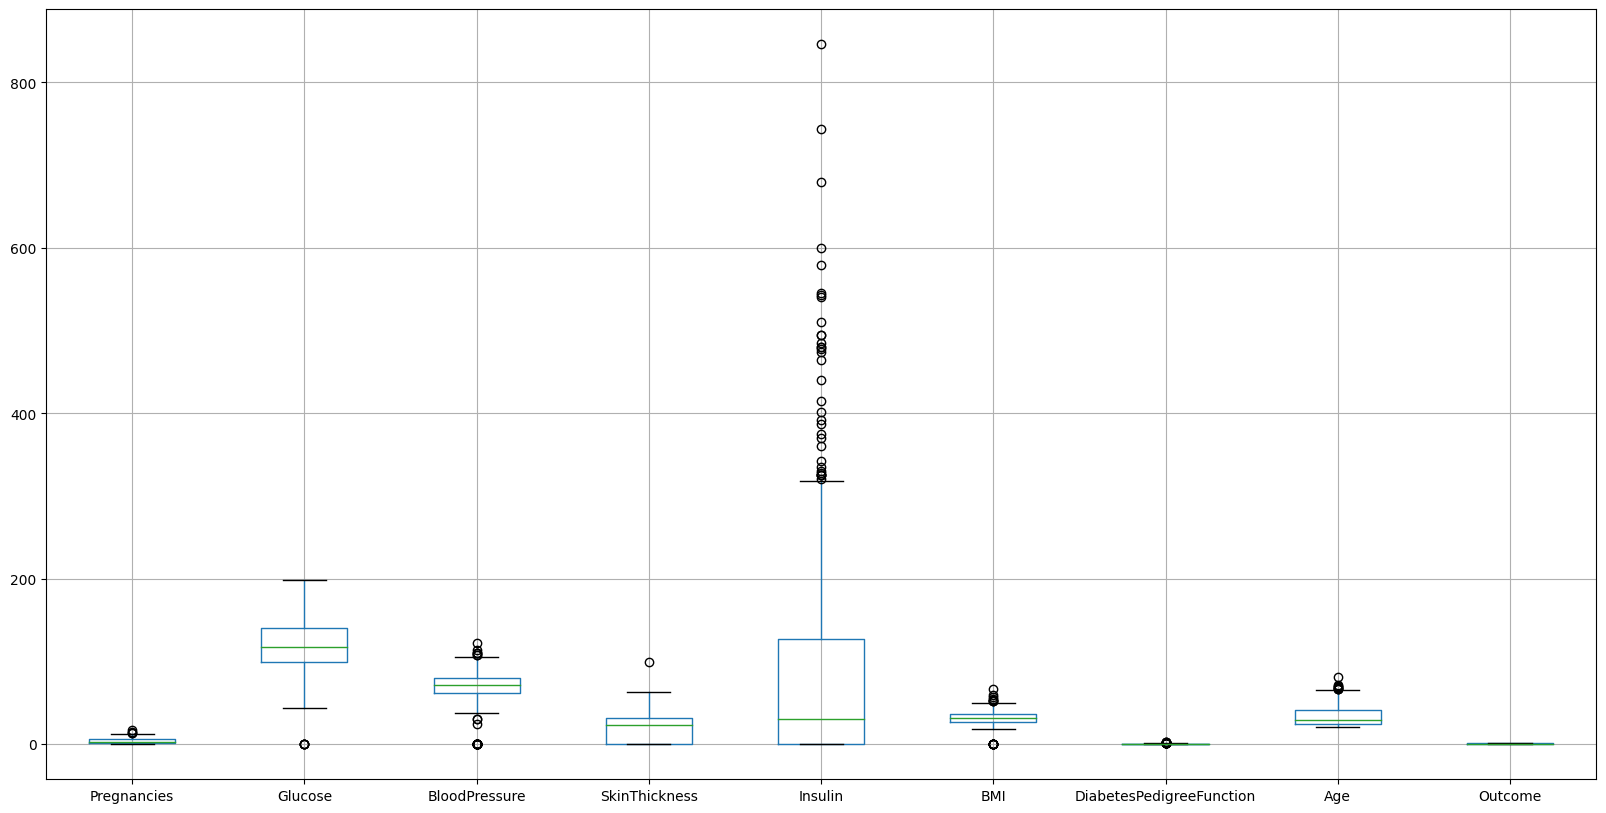

In [9]:
#Plot box-plot to check for any outliers
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
diabetes_data.boxplot()

In [10]:
#Checking for missing values
diabetes_data[diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
diabetes_data[diabetes_data['Insulin']!=0]['Insulin'].median()

125.0

In [12]:
#Replace missing values with median value excluding zero
for i in diabetes_data.columns[1:6]:
  print(i)
  median_value=diabetes_data[diabetes_data[i]!=0][i].median()
  print(median_value)
  diabetes_data[i].replace(0,median_value,inplace=True)

Glucose
117.0
BloodPressure
72.0
SkinThickness
29.0
Insulin
125.0
BMI
32.3


In [13]:
#Check again for any missing values
diabetes_data[diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#Count data types of variables
diabetes_data.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

<Axes: >

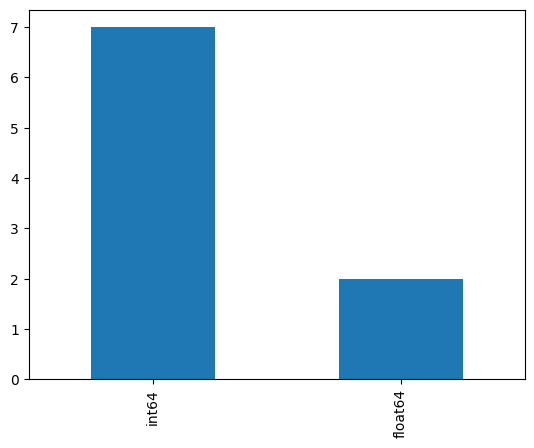

In [15]:
#Plot data types
diabetes_data.dtypes.value_counts().plot(kind='bar')

In [16]:
#Count number of outcomes
diabetes_data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
#check data distribution in percentage. We can see 65.10% without diabetes and 34.90% with diabetes. The balance of data is still acceptable. If it is imbalance data we can oversample to address this issue.
diabetes_data.Outcome.value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

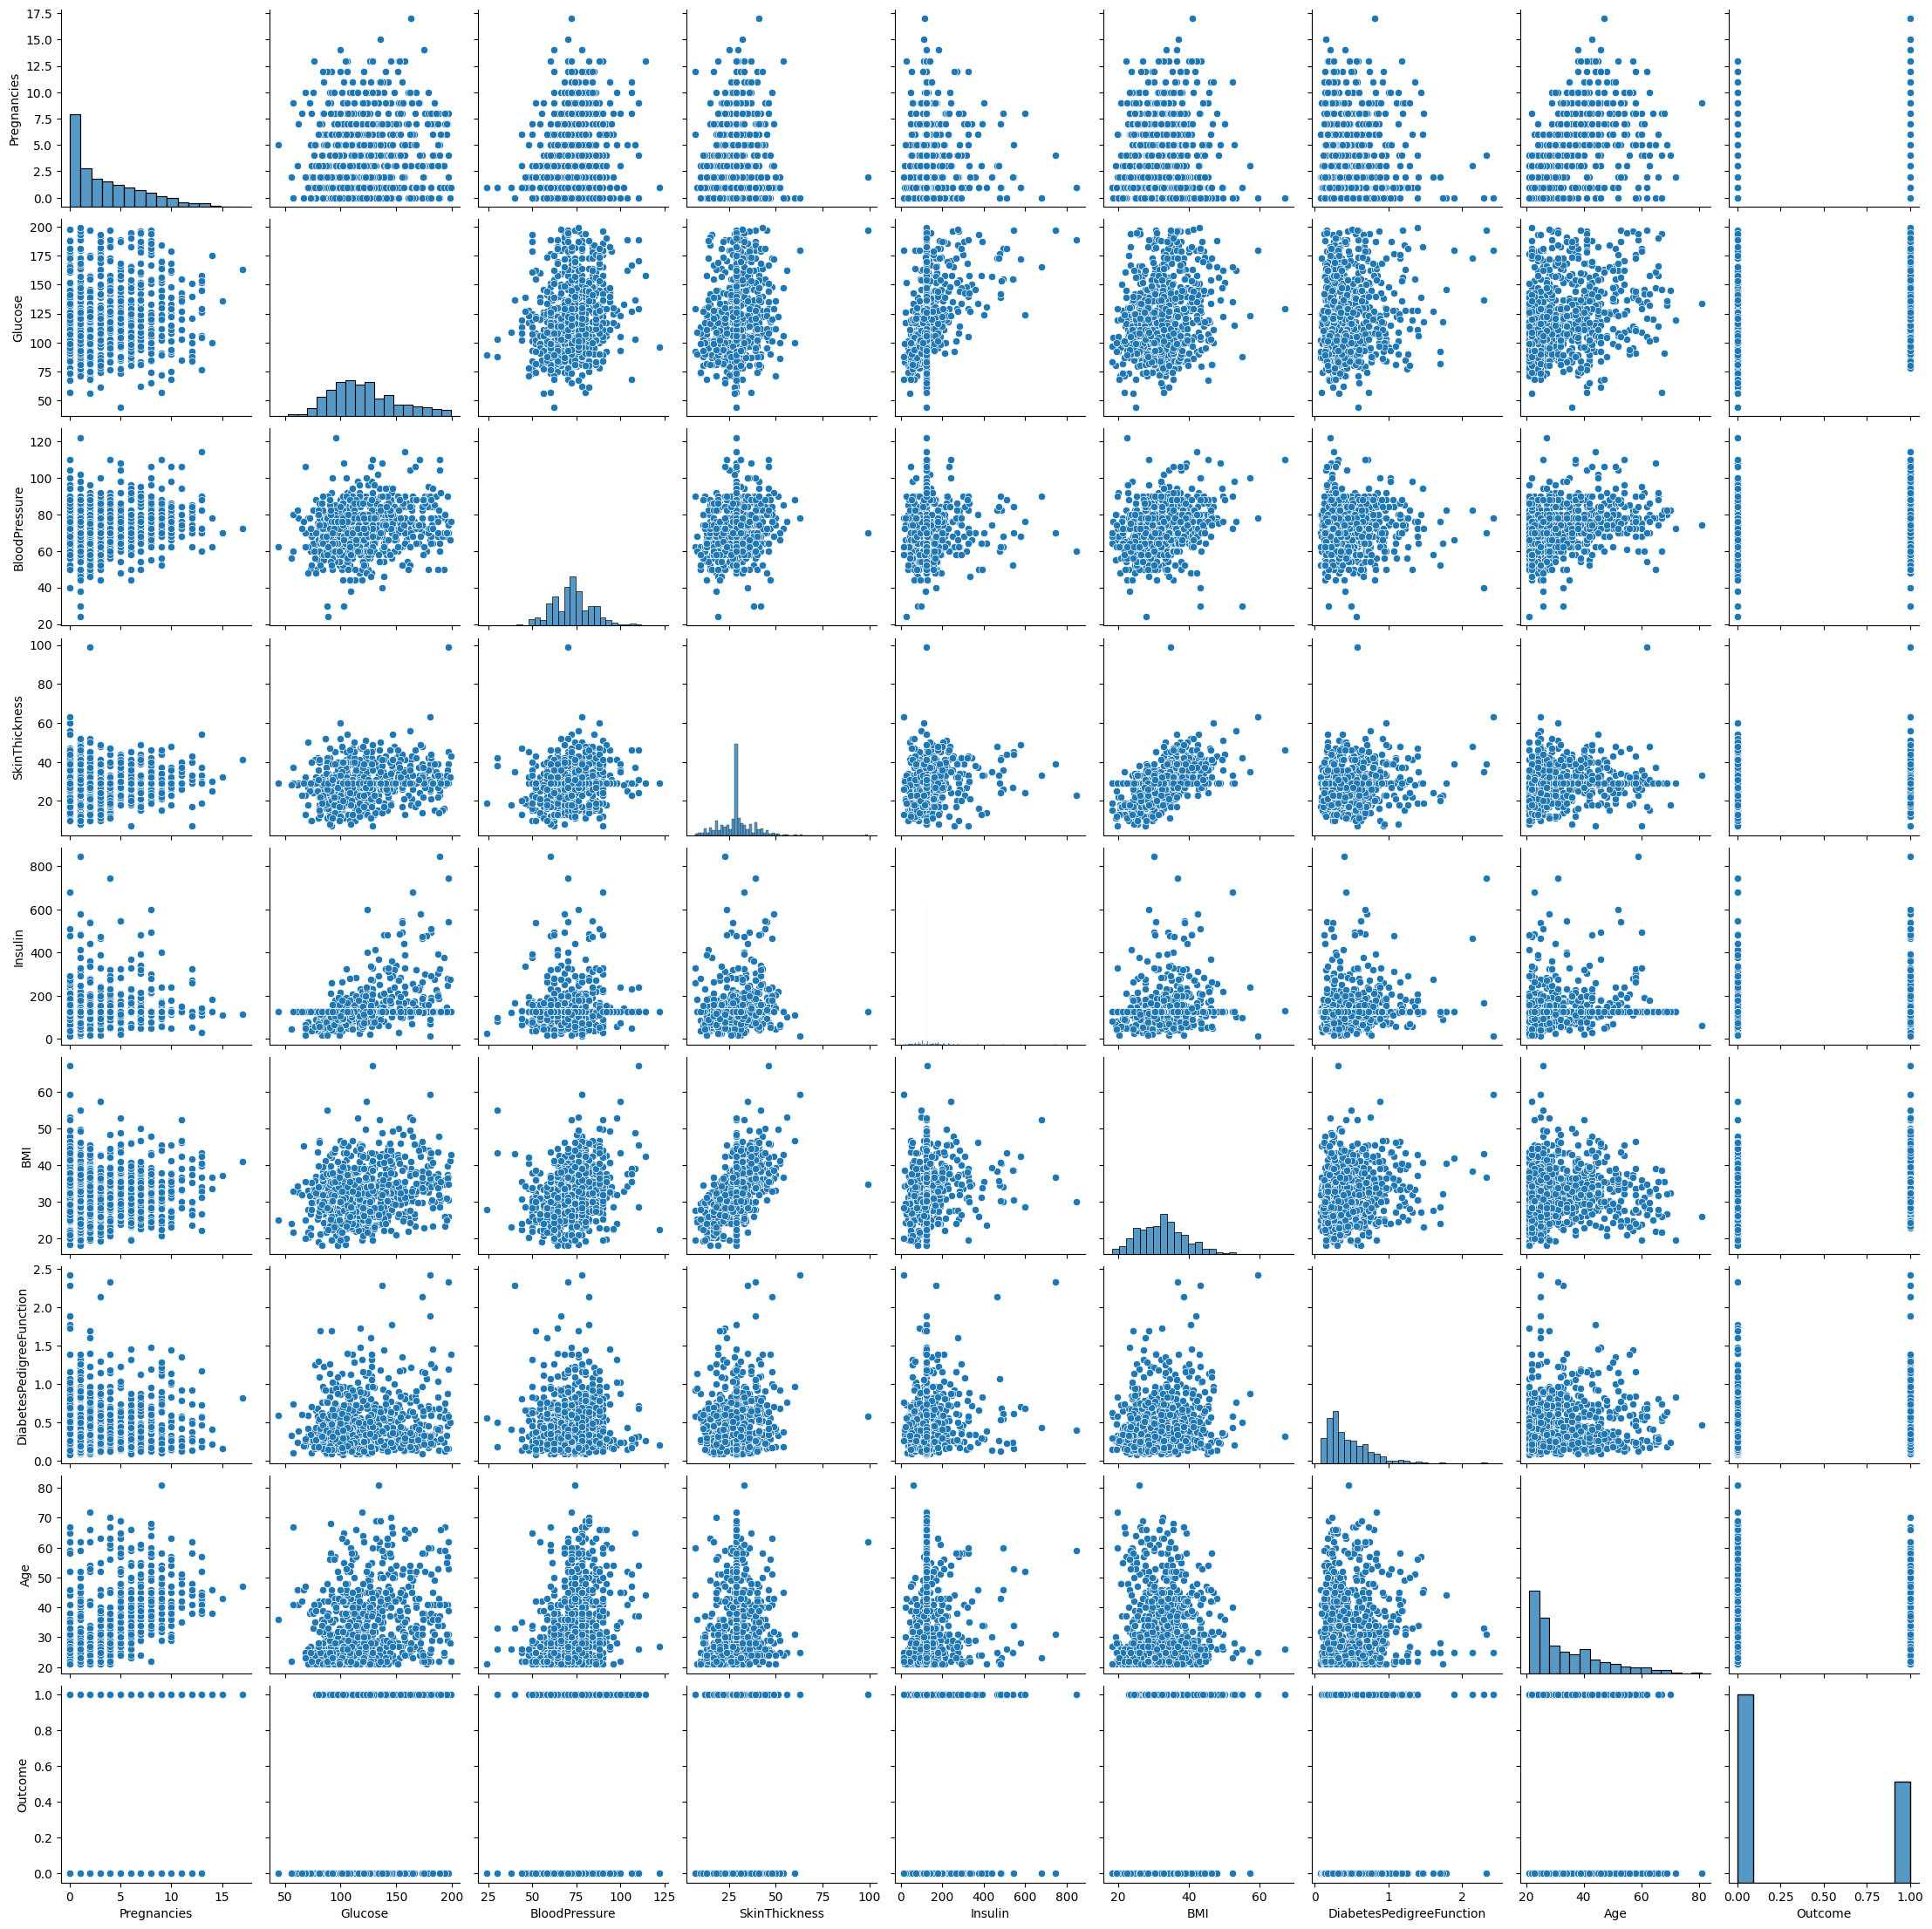

In [18]:
#Display scatterplots and histogram to check variables relationship. We can see positive correlations with some of the variables.
sns.pairplot(diabetes_data)

<Axes: >

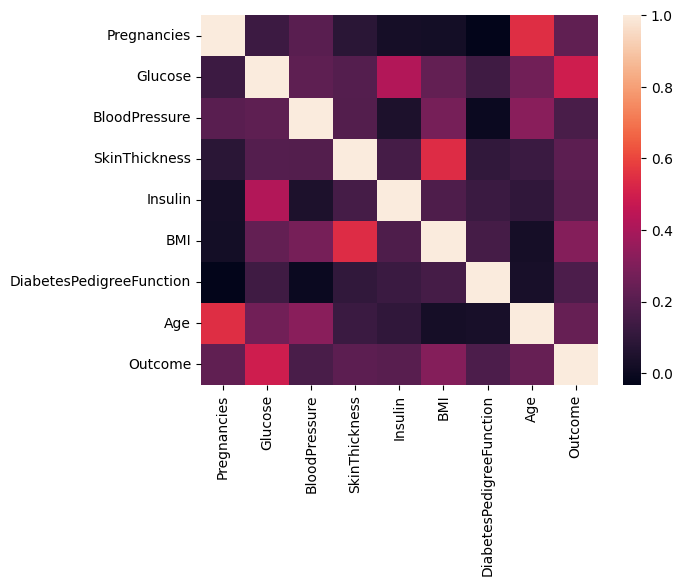

In [19]:
#Create a heatmap. The darker colours represents a higher correlation between variables.
sns.heatmap(diabetes_data.corr())

In [20]:
#Display correlations
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Glucose, Insulin, Age have a high correlation with outcome of diabetes.

In [21]:
#Define x and y to prepare for modeling
x = diabetes_data.drop('Outcome',axis=1)
y=diabetes_data['Outcome']

In [22]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
#Train Test Split with 75% train and 25% validation data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=102,stratify=y)

In [25]:
#Check the shape of train and test data
train_x.shape, test_x.shape

((576, 8), (192, 8))

**K Nearest Neigbours**

In [26]:
#Using Min Max Scaler to standardize the data before fitting into KNN
knn=KNeighborsClassifier(n_neighbors = 3)
SC=MinMaxScaler()


In [27]:
std_x_train=SC.fit_transform(train_x)
std_x_train

array([[0.05882353, 0.59354839, 0.51020408, ..., 0.39263804, 0.13484589,
        0.05      ],
       [0.29411765, 0.38709677, 0.51020408, ..., 0.21676892, 0.02953767,
        0.45      ],
       [0.35294118, 0.52258065, 0.44897959, ..., 0.24130879, 0.16267123,
        0.18333333],
       ...,
       [0.29411765, 0.78709677, 0.48979592, ..., 0.15541922, 0.21532534,
        0.5       ],
       [0.29411765, 0.46451613, 0.51020408, ..., 0.15132924, 0.05008562,
        0.15      ],
       [0.05882353, 0.47096774, 0.65306122, ..., 0.33333333, 0.13655822,
        0.31666667]])

In [28]:
std_x_test=SC.fit_transform(test_x)
std_x_test

array([[0.41666667, 0.69924812, 0.47058824, ..., 0.34017595, 0.05730786,
        0.875     ],
       [0.        , 0.52631579, 0.82352941, ..., 0.6568915 , 0.09151488,
        0.10416667],
       [0.25      , 0.87969925, 0.52941176, ..., 0.36070381, 0.11861395,
        0.16666667],
       ...,
       [0.33333333, 0.23308271, 0.26470588, ..., 0.07624633, 0.11639271,
        0.10416667],
       [0.33333333, 0.08270677, 0.35294118, ..., 0.46334311, 0.13904931,
        0.08333333],
       [0.08333333, 0.76691729, 0.52941176, ..., 0.15249267, 0.16392714,
        0.25      ]])

In [29]:
#Fit train data into KNN
knn.fit(std_x_train,train_y)

KNeighborsClassifier(n_neighbors=3)

In [30]:
#Predict using validation data
pred = knn.predict(std_x_test)

In [31]:
pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [32]:
#Display confusion matrix
print(confusion_matrix(test_y,pred))

[[103  22]
 [ 27  40]]


In [33]:
#KNN score for train data
knn.score(std_x_train,train_y)

0.8506944444444444

In [34]:
#KNN score for test data
knn.score(std_x_test,test_y)

0.7447916666666666

In [35]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       125
           1       0.65      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



In [36]:
error_rate = []
k_n = range(1,40)

# Check the error rate for KNN
for i in k_n:

    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(train_x,train_y)

    pred_i = knn.predict(test_x)

    error_rate.append(accuracy_score (test_y , pred_i ) * 100)

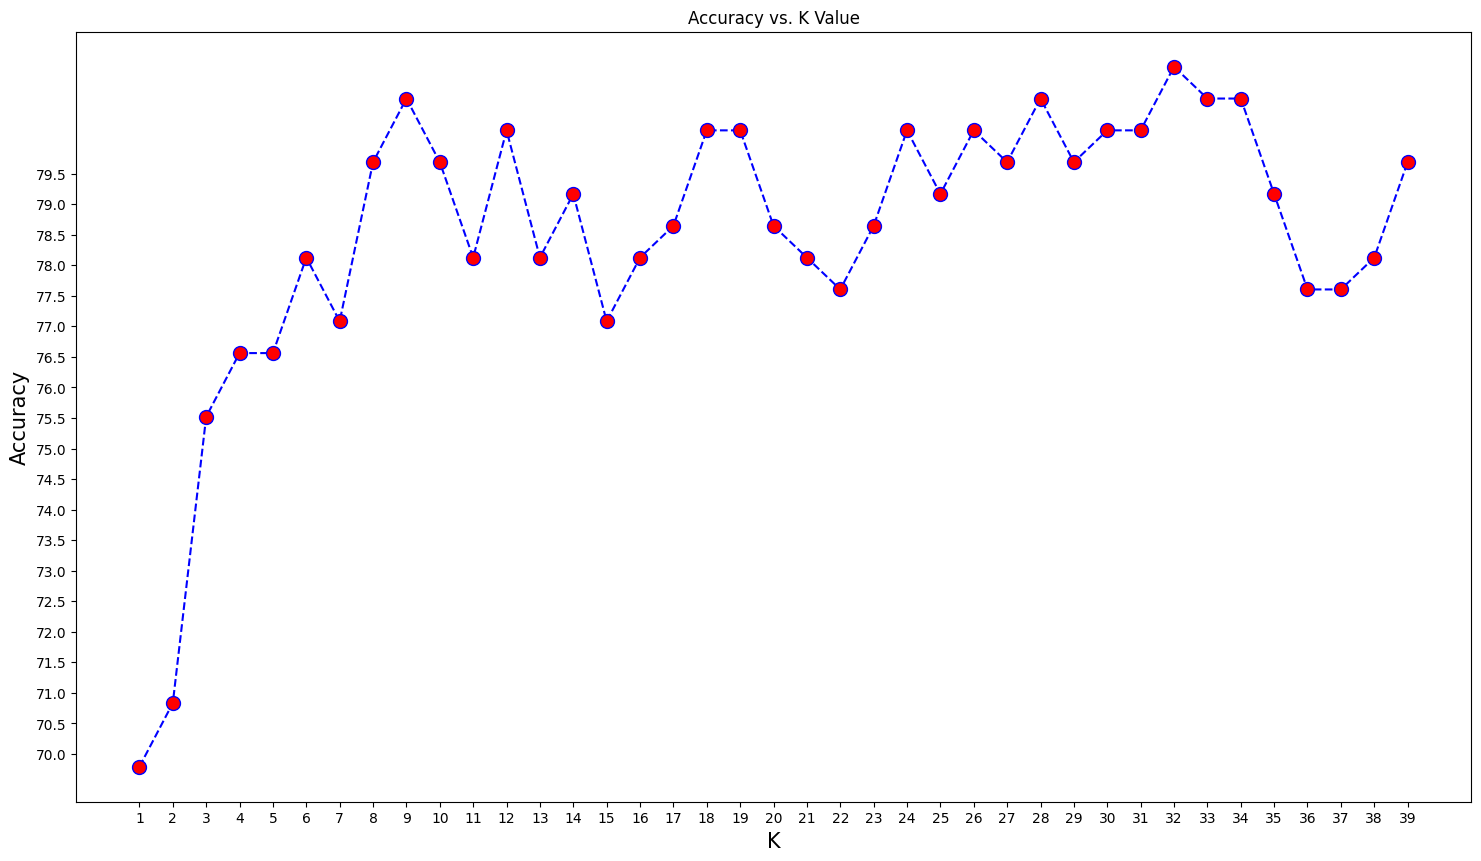

In [37]:
#Plot accuracy vs K value
plt.figure(figsize = (18,10))

plt.plot(k_n,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor = 'red', markersize = 10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K' , size = 15)
plt.xticks(k_n)
plt.yticks(np.arange(70,80,0.5))
plt.ylabel('Accuracy' , size = 15)
plt.show()

**Random Forest**

In [38]:
rmc= RandomForestClassifier()
rmc.fit(std_x_train,train_y)

RandomForestClassifier()

In [39]:
RandomForestClassifier(bootstrap=True,max_depth=6,random_state=102,n_estimators=200,max_features=5)

RandomForestClassifier(max_depth=6, max_features=5, n_estimators=200,
                       random_state=102)

In [40]:
??RandomForestClassifier

In [41]:
y_predict=rmc.predict(std_x_test)

In [42]:
y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
rmc.score(std_x_train,train_y)

1.0

In [44]:
rmc.score(std_x_test,test_y)

0.7708333333333334

In [45]:
print(accuracy_score(test_y,y_predict))

0.7708333333333334


In [46]:
print(confusion_matrix(test_y,y_predict))

[[106  19]
 [ 25  42]]


In [47]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       125
           1       0.69      0.63      0.66        67

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



In [48]:
#Apply K-Fold for cross-validation to ensure all data used
kfold=KFold(n_splits=10,random_state=102,shuffle=True)

rmc=RandomForestClassifier(random_state=102,n_jobs = -1)
print(cross_val_score(rmc,x,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmc,x,y,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.75324675 0.83116883 0.80519481 0.75324675 0.77922078 0.71428571
 0.7012987  0.79220779 0.81578947 0.76315789]
77.08817498291182


In [49]:
rmc.fit(std_x_train,train_y)

RandomForestClassifier(n_jobs=-1, random_state=102)

In [50]:
y_predict=rmc.predict(std_x_test)
y_predict

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [51]:
print(confusion_matrix(test_y,y_predict))

[[105  20]
 [ 25  42]]


In [52]:
#True Positive Rate
105/(105+25)

0.8076923076923077

In [53]:
#False Positive Rate
20/(42+20)

0.3225806451612903

**Logistic Regression**

In [54]:
LR= LogisticRegression(max_iter=100)

In [55]:
LR.fit(std_x_train,train_y)

LogisticRegression()

In [56]:
LR.score(std_x_train,train_y)

0.7638888888888888

In [57]:
LR.score(std_x_test,test_y)

0.8072916666666666

In [58]:
y_predict1=LR.predict(std_x_test)

In [59]:
y_predict1

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [60]:
print(classification_report(test_y,y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       125
           1       0.76      0.66      0.70        67

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



**XGBoost Classifier**

In [61]:
from xgboost.callback import EarlyStopping
xgb1=XGBClassifier(random_state=102, learning_rate=0.15,max_depth=4,early_stopping_round=100,eval_metric='auc')

In [62]:
#??XGBClassifier

In [63]:
xgb1.fit(std_x_train,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_round=100,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [64]:
xgb1.score(std_x_train,train_y)

0.9791666666666666

In [65]:
xgb1.score(std_x_test,test_y)

0.7395833333333334

In [66]:
y_predict2=xgb1.predict(std_x_test)

In [67]:
pd.DataFrame(y_predict2).value_counts()

0    119
1     73
Name: count, dtype: int64

In [68]:
#Apply kfold cross validation with stratified sampling so all data are used to train and test. It helps to improve the performance of the model
kfold=KFold(n_splits=5,random_state=102,shuffle=True)

print(cross_val_score(xgb1,x,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(xgb1,x,y,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.78571429 0.79220779 0.74025974 0.73202614 0.78431373]
76.69043374925728


In [69]:
print(classification_report(test_y,y_predict2))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.62      0.67      0.64        67

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.74      0.74       192



**Comparing the performance of different classification algorithms.**

In [70]:
rv_prob=[0 for i in range (len(test_y))]
knn_prob=knn.predict_proba(test_x)
rmc_prob=rmc.predict_proba(test_x)
lr1_prob=LR.predict_proba(test_x)

In [71]:
knn_prob=knn_prob[:,1]
rmc_prob=rmc_prob[:,1]
lr1_prob=lr1_prob[:,1]

In [72]:
rv_auc=roc_auc_score(test_y,rv_prob)
knn_auc=roc_auc_score(test_y,knn_prob)
rmc_auc=roc_auc_score(test_y,rmc_prob)
lr1_auc=roc_auc_score(test_y,lr1_prob)

In [73]:
print('Random Values Prediction: AUROC = %.3f' % (rv_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('RMC: AUROC = %.3f' % (rmc_auc))
print('LR: AUROC = %.3f' % (lr1_auc))

Random Values Prediction: AUROC = 0.500
KNN: AUROC = 0.835
RMC: AUROC = 0.435
LR: AUROC = 0.500


In [74]:
r_fpr, r_tpr, _ = roc_curve(test_y, rv_prob)
knn_fpr, knn_tpr, _ = roc_curve(test_y, knn_prob)
rmc_fpr, rmc_tpr, _ = roc_curve(test_y, rmc_prob)
lr1_fpr, lr1_tpr, _ = roc_curve(test_y, lr1_prob)

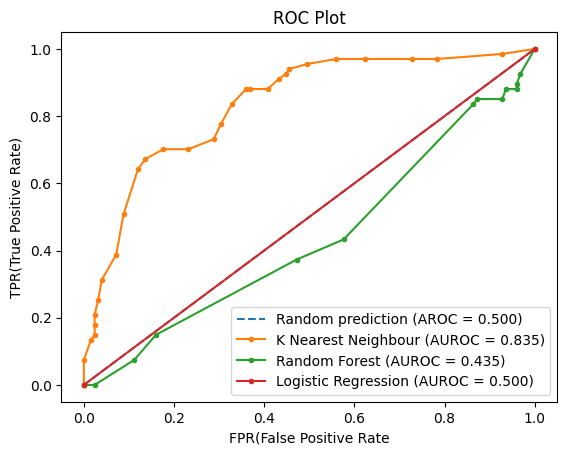

In [75]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AROC = %0.3f)' % rv_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbour (AUROC = %0.3f)' % knn_auc)
plt.plot(rmc_fpr, rmc_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rmc_auc)
plt.plot(lr1_fpr, lr1_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr1_auc)

# Plot title
plt.title('ROC Plot')
# x and y axis labels
plt.xlabel('FPR(False Positive Rate')
plt.ylabel('TPR(True Positive Rate)')
# Display legends
plt.legend() #
# Display plot
plt.show()

**Final Model**

In [76]:
#Apply K-Fold for cross-validation to ensure all data used
kfold=KFold(n_splits=10,random_state=102,shuffle=True)

rmc=RandomForestClassifier(random_state=102,n_jobs = -1)
print(cross_val_score(rmc,x,y,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmc,x,y,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.75324675 0.83116883 0.80519481 0.75324675 0.77922078 0.71428571
 0.7012987  0.79220779 0.81578947 0.76315789]
77.08817498291182


In [77]:
fianl_pred=y_predict
fianl_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [78]:
final_model=print(confusion_matrix(test_y,y_predict))

[[105  20]
 [ 25  42]]


In [79]:
print(classification_report(test_y,y_predict1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       125
           1       0.76      0.66      0.70        67

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



Precision=TP/(TP+FP)

Recall=TP/(TP+FN)

Accuracy= (TP+TN)/(TP+TN+FP+FN)

F1-score=(2 x Precision x Recall)/(Precision + Recall)

**Conclusion:**

By comparing the performance with F1 score (harmonic mean) from classification report, we can see random forest and logistic regression have better performance than K Nearest Neigbour. Logistic regression seems to be a better choice but it is possible of overfitting. Our final model will be using Random Foreset with K-Fold cross validations. Random Forest is using bagging and voting to imrpove accuracy and to minimize overfitting. To improve the model, we can use pipeline and feature engineering.

**Tableau Dashboard:**

https://public.tableau.com/views/CapstoneProject2HealthcarePGP/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link